<a href="https://colab.research.google.com/github/shroukdiaa/ML_tasks/blob/main/task_ml_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and Explore the Data

In [15]:
data = pd.read_csv('/content/house_data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing Values

In [17]:
data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [18]:
missing_value = data.isnull().sum()
print(missing_value[missing_value>0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [19]:
missing_percentage = data.isnull().sum()/len(data)*100
print(missing_percentage[missing_percentage>0])


LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [20]:
data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)


In [21]:
missing_percentage = data.isnull().sum()/len(data)*100
print(missing_percentage[missing_percentage>0])

LotFrontage     17.739726
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [22]:
data['LotFrontage'].fillna(value=data['LotFrontage'].median(),inplace=True)
data['MasVnrType'].fillna(value='None',inplace=True)
data['MasVnrArea'].fillna(0,inplace=True)
data['BsmtQual'].fillna(value='No',inplace=True)
data['BsmtCond'].fillna(value='TA',inplace=True)
data['BsmtExposure'].fillna(value='No',inplace=True)
data['BsmtFinType1'].fillna(value='NO',inplace=True)
data['BsmtFinType2'].fillna(value='Unf',inplace=True)
data['Electrical'].fillna(value='SBrkr',inplace=True)
data['GarageType'].fillna(value='Attchd',inplace=True)
data['GarageYrBlt'].fillna(value=data['GarageYrBlt'].median(),inplace=True)
data['GarageFinish'].fillna(value='Unf',inplace=True)
data['GarageQual'].fillna(value='TA',inplace=True)
data['GarageCond'].fillna(value='TA',inplace=True)


In [23]:
missing_value = data.isnull().sum()
print(missing_value[missing_value>0])

Series([], dtype: int64)


# categorical data encoding

In [42]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())
len(categorical_cols)

Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


38

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols=categorical_cols.tolist()
for col in cols:
  data[col] = le.fit_transform(data[col])
  print(le.classes_)

['C (all)' 'FV' 'RH' 'RL' 'RM']
['Grvl' 'Pave']
['IR1' 'IR2' 'IR3' 'Reg']
['Bnk' 'HLS' 'Low' 'Lvl']
['AllPub' 'NoSeWa']
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
['Gtl' 'Mod' 'Sev']
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing']
['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock'

# Splitting the Data

In [26]:
!pip install scikit-learn

In [30]:
from sklearn.model_selection import train_test_split

In [44]:
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,3,70.0,8400,1,3,3,0,4,...,0,0,0,0,0,0,6,2010,8,4
1066,1067,60,3,59.0,7837,1,0,3,0,4,...,40,0,0,0,0,0,5,2009,8,4
638,639,30,3,67.0,8777,1,3,3,0,4,...,0,164,0,0,0,0,5,2008,8,4
799,800,50,3,60.0,7200,1,3,3,0,0,...,0,264,0,0,0,0,6,2007,8,4
380,381,50,3,50.0,5000,1,3,3,0,4,...,0,242,0,0,0,0,5,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,3,78.0,9317,1,0,3,0,4,...,22,0,0,0,0,0,3,2007,8,4
1130,1131,50,3,65.0,7804,1,3,3,0,4,...,44,0,0,0,0,0,12,2009,8,4
1294,1295,20,3,60.0,8172,1,3,3,0,4,...,0,0,0,0,0,0,4,2006,8,4
860,861,50,3,55.0,7642,1,3,3,0,0,...,240,0,0,0,0,0,6,2007,8,4


In [45]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,893,20,3,70.0,8414,1,3,3,0,4,...,0,0,0,0,0,0,2,2006,8,4
1105,1106,60,3,98.0,12256,1,0,3,0,0,...,32,0,0,0,0,0,4,2010,8,4
413,414,30,4,56.0,8960,1,3,3,0,4,...,0,130,0,0,0,0,3,2010,8,4
522,523,50,4,50.0,5000,1,3,3,0,0,...,24,36,0,0,0,0,10,2006,8,4
1036,1037,20,3,89.0,12898,1,0,1,0,4,...,0,0,0,0,0,0,9,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,4,50.0,5925,1,3,0,0,4,...,72,0,0,0,0,0,3,2007,8,2
1361,1362,20,3,124.0,16158,1,0,2,0,4,...,36,0,0,0,0,0,6,2009,8,4
802,803,60,3,63.0,8199,1,3,3,0,4,...,18,0,0,0,0,0,10,2008,8,4
651,652,70,3,60.0,9084,1,3,3,0,4,...,0,0,0,0,0,0,10,2009,8,4


In [46]:
y_train

,SalePrice
254,145000
1066,178000
638,85000
799,175000
380,127000
...,...
1095,176432
1130,135000
1294,115000
860,189950


# Train the Model

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [50]:
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_}")
print(len(regressor.coef_))

Intercept: 1373156.42913825
Coefficient: [-2.91817575e+00 -1.45420934e+02 -2.03820185e+03 -2.19374353e+02
  2.91286346e-01  1.87771764e+04 -1.11231620e+03  3.31855801e+03
 -5.00498749e+04 -2.85069123e+00  1.32168378e+04  4.51476046e+02
 -2.84206306e+02 -9.96643564e+03 -2.17199036e+03 -1.31187174e+03
  1.18233050e+04  4.17965631e+03  1.61033352e+02  7.48557141e+01
  3.25750652e+03  3.80750958e+03 -1.10358749e+03  4.90318389e+02
  4.70522745e+03  2.60599816e+01 -7.96587763e+03  1.18855073e+02
  7.56526317e+02 -5.22693345e+03  3.61849508e+03 -3.83770082e+03
 -6.41786865e+02  2.52874342e+00  1.12229177e+03  5.42452166e+00
 -3.18861595e+00  4.76464914e+00 -1.31517542e+03 -2.76412570e+02
  1.27282608e+03 -3.31797961e+02  1.53116604e+01  1.66584718e+01
 -3.21533143e+00  2.87548007e+01  8.86588018e+03 -3.52221927e+02
  2.71210057e+03 -6.82922324e+02 -2.51638942e+03 -1.12911302e+04
 -1.00329382e+04  3.60479099e+03  4.67583997e+03  5.09918883e+03
 -8.26429884e+02 -1.65525656e+01 -8.54457215e+01 

In [51]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Comparing actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual      Predicted
892   154500  152962.752372
1105  325000  316607.505629
413   115000  112902.394707
522   159000  178263.952712
1036  315500  315972.912544
...      ...            ...
479    89471  129850.111676
1361  260000  269868.781529
802   189000  218102.197668
651   108000  110789.791951
722   124500  101410.098373

[292 rows x 2 columns]


# Evaluate the Model

In [52]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 21782.505371521835
Mean Squared Error (MSE): 1187465373.6006649
Root Mean Squared Error (RMSE): 34459.61946395614
R² Score: 0.8451871091886541


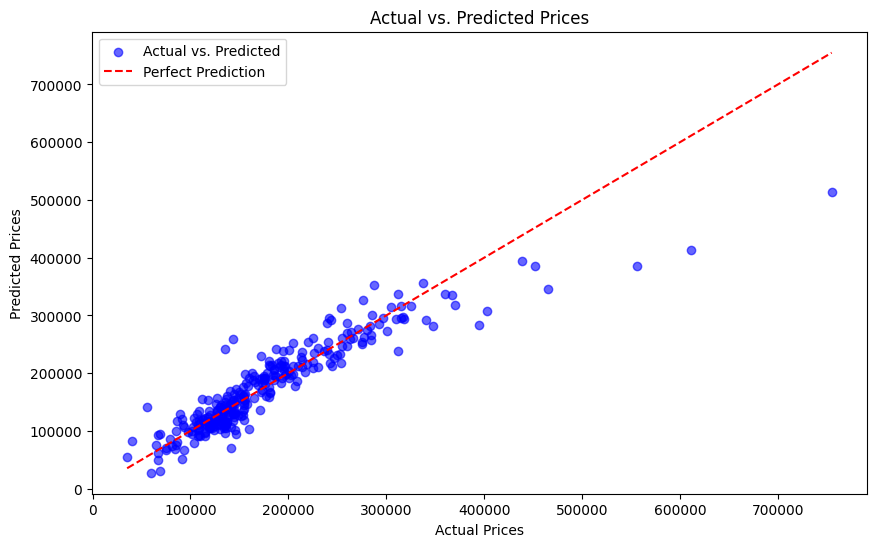

In [54]:
 #Plotting Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend(['Actual vs. Predicted', 'Perfect Prediction'])
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

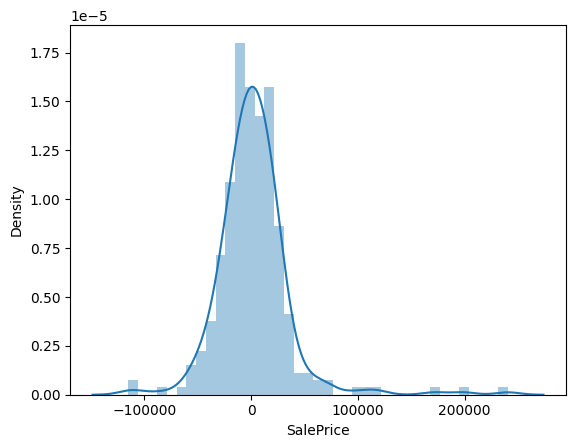

In [55]:
sns.distplot(y_test-y_pred)

<Axes: xlabel='SalePrice'>

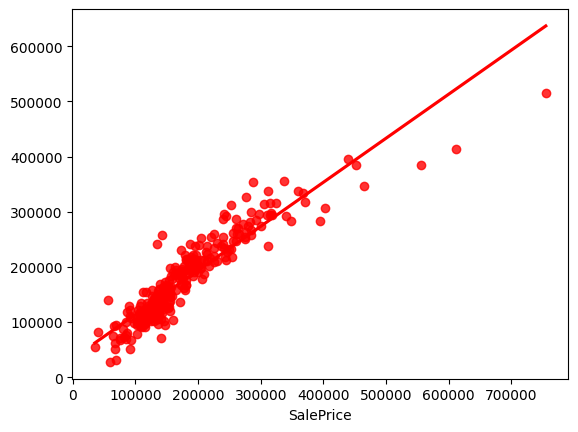

In [56]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')